<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Баланс-классов" data-toc-modified-id="Баланс-классов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Баланс классов</a></span></li><li><span><a href="#Деление-данных-на-выборки" data-toc-modified-id="Деление-данных-на-выборки-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Деление данных на выборки</a></span></li><li><span><a href="#Обучение-модели" data-toc-modified-id="Обучение-модели-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Обучение модели</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Взвешивание-классов" data-toc-modified-id="Взвешивание-классов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Взвешивание классов</a></span></li><li><span><a href="#Увеличение-выборки" data-toc-modified-id="Увеличение-выборки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Увеличение выборки</a></span></li><li><span><a href="#Уменьшение-выборки" data-toc-modified-id="Уменьшение-выборки-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Уменьшение выборки</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

Импортируем необходимые библиотеки и загружаем данные:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix, roc_auc_score, roc_curve
import warnings

warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('/datasets/Churn.csv')

Посмотрим на первые строки и общую информацию о данных:

In [3]:
display(data.head())
data.info()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


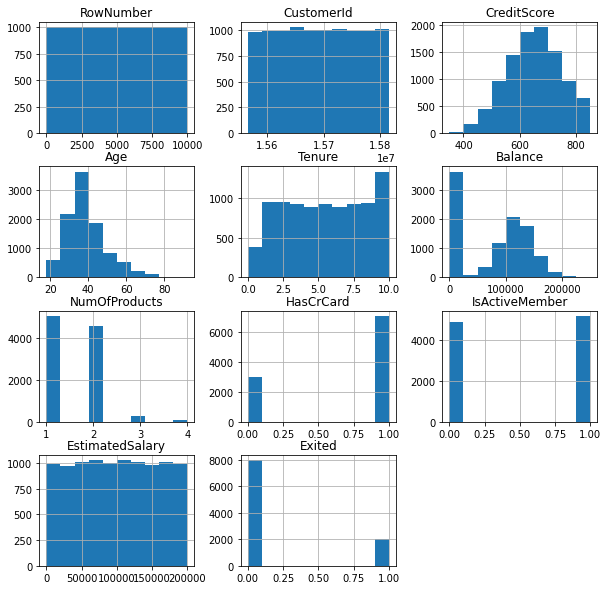

In [4]:
data.hist(figsize=(10, 10));

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
 
👍  Отлично. Если добавить знак `;` к строке с выводом графика, то уберем служебную информацию.
    
`data.hist(figsize=(10, 10));`    

</div>  
 

Конечная цель проекта - спрогнозировать уйдет клиент из банка в ближайшее время или нет. При этом столбцы `RowNumber`, `CustomerId` и `Surname` содержат уникальные идентификаторы клиентов и персональные данные, которые не несут никакой информации для прогнозирования целевого признака. Поэтому для дальнейшего анализа можно удалить эти столбцы из датасета.

In [5]:
data_copy = data.copy()
data_copy = data_copy.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Всё верно  
</div>  

    

Посмотрим на количество уникальных значений в категориальных признаках `Geography` и `Gender`:

In [6]:
print(data_copy['Geography'].value_counts())
print(data_copy['Gender'].value_counts())

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
Male      5457
Female    4543
Name: Gender, dtype: int64


Преобразуем категориальные признаки в числовые при помощи техники One-Hot Encoding:

In [7]:
data_copy = pd.get_dummies(data_copy, columns=['Geography', 'Gender'], drop_first=True)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Согласен. В дамми-ловушку не попались.
</div>


<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

В тренажере давался пример использования прямого кодирования с помощью get_dummies, однако это далеко не самый оптимальный вариант. Он подходит для анализа данных, но в машинном обучении может служить причиной ошибок при обучении моделей.
    
Можно использовать класс <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html">OHE из sklearn</a>. Он точно понадобится в будущих проектах, можно потренироваться сейчас. 

Практикум подготовил инструкцию, как использовать OHE: https://colab.research.google.com/drive/1_gAMXcQKoCShB_l8FNtYEejMnosm9mvt?usp=sharing 

А теперь замечания «под звездочкой»:

Есть загвоздка, что нам нужно будет одновременно использовать параметры drop='first' и handle_unknown='ignore’.  в OHE, а на платформе такое сочетание может выдавать ошибку (в части случаев). Если ошибка появляется, необходимо загрузить нужную версию сайкит-лерна. Для этого:

1. В отдельной строке в самом начале проекта запускаем такую команду:
 `!pip install scikit-learn==1.1.3`
     
2. Находим в меню юпитера кнопку `Kernel`, нажимаем и выбираем Restart&Run all 


И сразу уточню, что OHE мы используем уже после разделения выборок на обучающую, валидационную и тестовую. Обучаем на трейне, применяем ко всем. Кодируем после разбиения по аналогии с масштабированием. Посмотреть поподробнее также можно здесь <a href="https://stackoverflow.com/questions/55525195/do-i-have-to-do-one-hot-encoding-separately-for-train-and-test-dataset">можно здесь</a> .
      
</div> 

## Исследование задачи

Для выполнения задачи нужно выполнить следующие шаги:

1. Исследовать баланс классов в целевой переменной `Exited`.

2. Разбить данные на обучающую, валидационную и тестовую выборки в пропорции 60/20/20.

3. Обучить модель без учета дисбаланса классов, используя стандартные гиперпараметры и метрики качества.

4. Проанализировать метрики качества модели и сделать выводы о ее эффективности для задачи классификации несбалансированных данных.

### Баланс классов

Для исследования баланса классов выясним количество объектов в каждом классе целевой переменной Exited.

In [8]:
class_counts = data_copy['Exited'].value_counts()
print(class_counts)

0    7963
1    2037
Name: Exited, dtype: int64


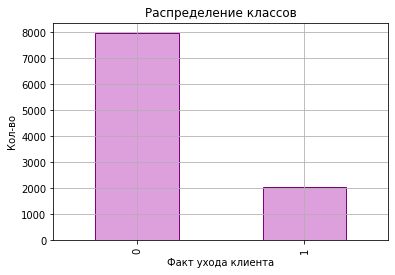

In [9]:
class_counts.plot(kind='bar', grid=True, color='plum', edgecolor='purple')
plt.title('Распределение классов')
plt.xlabel('Факт ухода клиента')
plt.ylabel('Кол-во')
plt.show()

На графике виден значительный разрыв между количеством объектов в классах, что говорит об их дисбалансе.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Дисбаланс исследовали. Да, он достаточно сильный, чтобы негативно повлиять на качество моделей.
</div>


### Деление данных на выборки

Столбец `Tenure` указывает, сколько лет клиент уже является клиентом банка. Отсутствие данных в этом столбце может быть связано с тем, что человек только что стал клиентом, или что банк не собирал эту информацию. В данном случае, поскольку пропуски составляют около 10% от всех значений в столбце `Tenure`, мы можем заполнить их медианным значением. Если мы не заполним пропуски, то при обучении модели возникнет ошибка, так как многие алгоритмы машинного обучения не могут работать с пропущенными значениями.

Используем медиану для заполнения пропусков в выборке.

In [10]:
median_tenure = data_copy['Tenure'].median()
data_copy['Tenure'] = data_copy['Tenure'].fillna(median_tenure)

Для того, чтобы построить модель для классификации пользователей и подбора подходящего тарифа, разделим исходные данные на обучающую, валидационную и тестовую выборки в пропорции 60/20/20.

In [11]:
features = data_copy.drop('Exited', axis=1)
target = data_copy['Exited']

features_train, features_valid_test, target_train, target_valid_test = train_test_split(features, target, test_size=0.4, random_state=12345)
features_valid, features_test, target_valid, target_test = train_test_split(features_valid_test, target_valid_test, test_size=0.5, random_state=12345)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 С разбиением на выборки согласен. 
</div>



<div class="alert alert-block alert-danger">
<h2><s> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
 
Здесь абсолютно верный подход, но рекомендую перенести это действие выше - до разбирения на выборки. Тогда все можно будет сделать в две строки.

</div>



<div class="alert alert-info">
Читала комментарии однокурсников о том, что медиана должна быть именно из обучающей выборки, чтобы не допустить "утечки данных", поэтому и заполнила пропуски после разбиения на выборки. Исправила согласно вашему замечанию.

<div class="alert alert-success">
<h2> Комментарий ревьюера #2 <a class="tocSkip"> </h2>

👍 Есть варианты, когда пропуски предпочтительнее заполнять после разделения - например, если заполняем с помощью алгоритмов типа симпоимпутера или knnimputer. Там мы также обучаемся на тренировочной выборке и применяем импутер ко всем выборкам. Если используем агрегирующие функции, то тут сложно представить, что мы выигрываем от заполнения после разделения. Насколько я могу судить, почти всегда в таких случаях заполняют до разделения на выборки.
    
Но вообще соглашусь, что, наверное, стоило это отметить желтым комментарием, потому что большой ошибки в том, чтобы заполнить после разделения, нет. Как уже сказал, если заполняем до разделения, код получается компактнее.
</div>

Численные признаки, такие как `CreditScore`, `Age`, `Tenure`, `Balance` и `EstimatedSalary`, имеют разные масштабы и величины. Чтобы не исказить результаты моделирования, требуется масштабировать эти признаки с помощью StandardScaler.

In [12]:
scaler = StandardScaler()

numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

features_train = scaler.fit_transform(features_train)
features_valid = scaler.transform(features_valid)
features_test = scaler.transform(features_test)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Здесь все корректно.
</div> 



### Обучение модели

Определим наилучшее значение метрики F1 для каждой модели: решающего дерева, случайного леса и логистической регрессии. Метрика F1 является гармоническим средним между точностью и полнотой, и показывает, как хорошо модель распознает положительный класс относительно всех классов.

In [13]:
# обучим решающее дерево с разной глубиной и выберем лучшую глубину с помощью метрики F1 на валидационной выборке

f1_list = []

for depth in range(1, 16):
    tree_model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    tree_model.fit(features_train, target_train)
    tree_predictions = tree_model.predict(features_valid)
    f1 = f1_score(target_valid, tree_predictions)
    f1_list.append(f1)
    
best_max_depth = f1_list.index(max(f1_list)) + 1
        
print(f"\nBest F1 Score: {max(f1_list)}, Best max_depth: {best_max_depth}")


Best F1 Score: 0.5696969696969697, Best max_depth: 6


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Согласен
</div> 


Значение метрики F1 находится в диапазоне от 0 до 1, где 1 соответствует идеальному значению, когда модель всегда предсказывает правильный класс. Значение F1 = 0 означает, что модель не способна предсказывать правильные классы.

Исходя из полученных результатов, можно сделать вывод, что наибольшее значение метрики F1 достигается при глубине дерева равной 6.

In [14]:
# обучаем модель с лучшими параметрами
best_tree_model = DecisionTreeClassifier(random_state=12345, max_depth=best_max_depth)
best_tree_model.fit(features_train, target_train)

# делаем предсказания на валидационной выборке
tree_predictions = best_tree_model.predict(features_valid)

# вычисляем метрику F1 на валидационной выборке
f1_tree = f1_score(target_valid, tree_predictions)

probabilities = best_tree_model.predict_proba(features_valid)
probabilities_one = probabilities[:, 1]

# выводим метрику F1, roc auc и матрицу ошибок
print(f"F1 Score: {f1_tree}")
print(f"Confusion Matrix:\n{confusion_matrix(target_valid, tree_predictions)}")
print('Площадь ROC-кривой:', roc_auc_score(target_valid, probabilities_one))

F1 Score: 0.5696969696969697
Confusion Matrix:
[[1528   54]
 [ 230  188]]
Площадь ROC-кривой: 0.8164631712023421


<div class="alert alert-block alert-danger">
<h2><s> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
 
Мы не имеем права трогать тестовую выборку до тестирования. На тестировании уже смотрим ранее подобранную лучшую модель. Иначе мы будем в той или иной мере подбирать лучшие параметры на тестовой выборке, а о том, как модель будет работать с реальными данными судить не сможем.

</div>

<div class="alert alert-info">
Исправлено на валидационную.

На валидационной выборке модель имеет значительное количество ложных срабатываний на лояльных клиентах, но значение roc_auc достаточно высоко.

In [15]:
# обучим случайный лес с разными значениями max_depth и n_estimators
# и выберем лучшие значения с помощью метрики F1 на валидационной выборке

f1_best = 0
best_depth = 0
best_est = 0

for depth in range(1, 13):
    for est in range(10, 101, 10):
        rf_model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        rf_model.fit(features_train, target_train)
        rf_predictions = rf_model.predict(features_valid)
        f1 = f1_score(target_valid, rf_predictions)
        if f1 > f1_best:
            f1_best = f1
            best_depth = depth
            best_est = est
            
print(f"Best F1 Score: {f1_best}, Best max_depth: {best_depth}, Best n_estimators: {best_est}")

Best F1 Score: 0.5896656534954408, Best max_depth: 12, Best n_estimators: 90


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Согласен, все корректно.
</div> 

Полученный результат показывает, что модель случайного леса с глубиной деревьев равной 12 и количеством деревьев (оценщиков) равным 90 дает наилучшую F1-оценку на валидационной выборке.

In [16]:
rf_model = RandomForestClassifier(random_state=12345, n_estimators=best_est, max_depth=best_depth)
rf_model.fit(features_train, target_train)

rf_predictions = rf_model.predict(features_valid)
f1_forest = f1_score(target_valid, rf_predictions)

probabilities = rf_model.predict_proba(features_valid)
probabilities_one = probabilities[:, 1]

print(f"F1 Score: {f1_forest}")
print(f"Confusion Matrix:\n{confusion_matrix(target_valid, rf_predictions)}")
print('Площадь ROC-кривой:', roc_auc_score(target_valid, probabilities_one))

F1 Score: 0.5896656534954408
Confusion Matrix:
[[1536   46]
 [ 224  194]]
Площадь ROC-кривой: 0.8483976433440803


<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Проверку на тестовой выборке нужно будет убрать.
       
</div>


<div class="alert alert-info">
Исправлено на валидационную.

После обучения модели случайного леса на данных, учитывая дисбаланс классов, мы получили результат на валидационной выборке с F1 0.59 и значение roc_auc 0.85. Невысокое значение метрики F1 объяснимо тем, что модель была обучена без учета дисбаланса. Мы также видим наличие ложно-положительных и ложно-отрицательных ответов в confusion matrix, что говорит о несовершенстве модели и необходимости дальнейшего улучшения.

In [17]:
# обучим модель логистической регрессии с разными значениями параметров С и solver
# и выберем лучшие значения с помощью метрики F1 на валидационной выборке

f1_best = 0
best_C = 0
best_solver = ''

for c in [0.1, 0.5, 1, 5, 10, 30, 100]:
    for solver in ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']:
        lr_model = LogisticRegression(random_state=12345, C=c, solver=solver)
        lr_model.fit(features_train, target_train)
        lr_predictions = lr_model.predict(features_valid)
        f1 = f1_score(target_valid, lr_predictions)
        if f1 > f1_best:
            f1_best = f1
            best_C = c
            best_solver = solver
            
print(f"Best F1 Score: {f1_best}, Best C: {best_C}, Best Solver: {best_solver}")

Best F1 Score: 0.33389544688026984, Best C: 5, Best Solver: newton-cg


Исходя из полученных результатов, лучшее значение F1-меры, равное 0.334, было достигнуто при параметрах C=5 и solver='newton-cg'.

In [18]:
lr_model = LogisticRegression(random_state=12345, C=best_C, solver=best_solver)
lr_model.fit(features_train, target_train)

lr_predictions = lr_model.predict(features_valid)
f1_regress = f1_score(target_valid, lr_predictions)

probabilities = lr_model.predict_proba(features_valid)
probabilities_one = probabilities[:, 1]

print(f"F1 Score: {f1_regress}")
print(f"Confusion Matrix:\n{confusion_matrix(target_valid, lr_predictions)}")
print('Площадь ROC-кривой:', roc_auc_score(target_valid, probabilities_one))

F1 Score: 0.33389544688026984
Confusion Matrix:
[[1506   76]
 [ 319   99]]
Площадь ROC-кривой: 0.758610625517938


<div class="alert alert-block alert-danger">
<h2><s> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
    
По проекту мы должны рассчитать также и roc_auc.
 
roc_auc нужно считать по вероятностям классов. 
    
`probabilities = model.predict_proba(features)
probabilities_one = probabilities[:, 1]
print('Площадь ROC-кривой:', roc_auc_score(target, probabilities_one))`

</div>


<div class="alert alert-info">
roc_auc рассчитан для каждой модели.

Модель логистической регрессии с наилучшими гиперпараметрами показала F1-меру равную 0.334 на валидационной выборке. Это значительно хуже, чем результаты, полученные с помощью моделей случайного леса и дерева решений. При этом стоит обратить внимание на матрицу ошибок: мы видим, что модель склонна к ложным отрицаниям (False Negatives), то есть ошибочно относит положительные ответы к отрицательному классу. Это может свидетельствовать о необходимости улучшения баланса классов. Значение roc_auc у модели логистической регрессии тоже ниже, чем у других.

Мы рассмотрели 3 модели машинного обучения - дерево решений, случайный лес и логистическую регрессию - для решения задачи прогнозирования оттока клиентов из банка. Лучшие результаты были получены с помощью дерева решений с максимальной глубиной 6. Эта модель на тестовой выборке показала F1-меру 0.534, значение roc_auc 0.85 и матрицу ошибок, где 1522 истинно-отрицательных и 174 ложно-отрицательных предсказаний, что является наилучшим результатом по сравнению с другими моделями. Однако, в целом, все модели показали достаточно низкий уровень предсказательной способности. Причиной этого может быть дисбаланс классов в целевом признаке.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
 
👍 Отличный вывод и хорошая интерпретация матрицы ошибок.
</div>  
 

## Борьба с дисбалансом

Для улучшения качества модели следует учесть дисбаланс классов. В нашем случае классы несбалансированы: объектов класса 1 меньше, чем объектов класса 0. Это может привести к тому, что модель будет предсказывать чаще класс 0, потому что его объектов больше. Чтобы избежать такой ситуации, попробуем использовать различные техники балансировки классов на следующих моделях: решающее дерево, случайный лес и логистической регрессии. После обучения мы сравним их по метрике F1-score и выберем лучшую модель.

Для учета дисбаланса классов можно использовать несколько методов:

- изменение порога классификации
- взвешивание классов
- увеличение выборки минорного класса (upsampling)
- уменьшение выборки мажорного класса (downsampling)
- комбинация методов up- и downsampling (balanced subsampling)

### Взвешивание классов

In [19]:
# взвешивание классов у дерева решений
f1_list = []

for depth in range(1, 16):
    tree_model = DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight='balanced')
    tree_model.fit(features_train, target_train)
    tree_predictions = tree_model.predict(features_valid)
    f1 = f1_score(target_valid, tree_predictions)
    f1_list.append(f1)
    
best_max_depth = f1_list.index(max(f1_list)) + 1
        
print(f"\nBest F1 Score: {max(f1_list)}, Best max_depth: {best_max_depth}")


Best F1 Score: 0.5963791267305644, Best max_depth: 5


In [20]:
# взвешивание классов случайный лес

f1_best = 0
best_depth = 0
best_est = 0

for depth in range(1, 13):
    for est in range(10, 101, 10):
        rf_model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth, class_weight='balanced')
        rf_model.fit(features_train, target_train)
        rf_predictions = rf_model.predict(features_valid)
        f1 = f1_score(target_valid, rf_predictions)
        if f1 > f1_best:
            f1_best = f1
            best_depth = depth
            best_est = est
            
print(f"Best F1 Score: {f1_best}, Best max_depth: {best_depth}, Best n_estimators: {best_est}")

Best F1 Score: 0.6298850574712643, Best max_depth: 9, Best n_estimators: 90


In [21]:
# взвешивание классов модель логистической регрессии

f1_best = 0
best_C = 0
best_solver = ''

for c in [0.1, 0.5, 1, 5, 10, 30, 100]:
    for solver in ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']:
        lr_model = LogisticRegression(random_state=12345, C=c, solver=solver, class_weight='balanced')
        lr_model.fit(features_train, target_train)
        lr_predictions = lr_model.predict(features_valid)
        f1 = f1_score(target_valid, lr_predictions)
        if f1 > f1_best:
            f1_best = f1
            best_C = c
            best_solver = solver
            
print(f"Best F1 Score: {f1_best}, Best C: {best_C}, Best Solver: {best_solver}")

Best F1 Score: 0.4897260273972603, Best C: 0.1, Best Solver: newton-cg


### Увеличение выборки

In [22]:
# функция для увеличения выборки
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_train_df = pd.DataFrame(features_train, columns=features.columns)
target_train_series = pd.Series(target_train).reset_index(drop=True)
features_upsampled, target_upsampled = upsample(features_train_df, target_train_series, 4)

<div class="alert alert-block alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2><s> Комментарий ревьюера #2 <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
 
Мы используем апсемплинг и даунсемплинг как два разных метода. Поэтому в каждом случае нужно довести баланс классов до 1:1. У нас дисбаланс 1:4, соответственно, здесь нужно будет умножить не на 2, а на 4 (подать такой коэффициент в функцию).
    

</div>


<div class="alert alert-info">
Спасибо за разъяснение. Сначала так и сделала, а потом попробовала коэффициент 2, который дал значение f1 чуть выше и оставила его ) Исправила.

<div class="alert alert-success">
<h2> Комментарий ревьюера #3 <a class="tocSkip"> </h2>

👍 Здесь дело может быть в тщательности подбора гиперпараметров и в случайности. Иногда бывает, что качество ухудшается, но если модель работает с данными хорошо и гиперпараметры мы подбираем максимально тщательно, то идеальный баланс будет стремиться к 1:1. Ну и аналитически нам важно попеременно показывать модели то один класс, то другой, тогда она будет лучшим образом отделять один от другого.
</div>
 

 <div class="alert alert-success">
<h2> Комментарий ревьюера #2 <a class="tocSkip"> </h2>

👍 Отлично, что используешь рукописную функцию, но здесь можно все оптимизировать, используя <a href="https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html">SMOTE</a> для увеличения выборки и <a href="https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html">RandomUnderSampler</a>  для уменьшения. 
    
Апсемплинг делается очень просто:
    
`oversample = SMOTE(random_state=RANDOM_STATE)`

`features_train_up, target_train_up = oversample.fit_resample(features_train_enc, target_train)`
    
*предварительно импотрировав `from imblearn.over_sampling import SMOTE`

**Чтобы импортировать imblearn его сначала требуется проинсталлировать. через `!pip install imblearn`
    
</div>



<div class="alert alert-info">
Так я сначала и пыталась сделать, но Юпитер постоянно выдавал ошибки, не хотел устанавливать imblearn. Я с этим надолго зависла, поэтому сделала как было описано в тренажере.

In [23]:
# upsampling дерево решений

f1_list = []

for depth in range(1, 16):
    tree_model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    tree_model.fit(features_upsampled, target_upsampled)
    predicted_valid = tree_model.predict(features_valid)
    f1 = f1_score(target_valid, predicted_valid)
    f1_list.append(f1)
    
best_max_depth = f1_list.index(max(f1_list)) + 1
        
print(f"\nBest F1 Score: {max(f1_list)}, Best max_depth: {best_max_depth}")


Best F1 Score: 0.5963791267305644, Best max_depth: 5


In [24]:
# upsampling случайный лес

f1_best = 0
best_depth = 0
best_est = 0

for depth in range(1, 13):
    for est in range(10, 101, 10):
        rf_model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        rf_model.fit(features_upsampled, target_upsampled)
        rf_predictions = rf_model.predict(features_valid)
        f1 = f1_score(target_valid, rf_predictions)
        if f1 > f1_best:
            f1_best = f1
            best_depth = depth
            best_est = est
            
print(f"Best F1 Score: {f1_best}, Best max_depth: {best_depth}, Best n_estimators: {best_est}")

Best F1 Score: 0.6291179596174282, Best max_depth: 9, Best n_estimators: 70


In [25]:
# upsampling модель логистической регрессии

f1_best = 0
best_C = 0
best_solver = ''

for c in [0.1, 0.5, 1, 5, 10, 30, 100]:
    for solver in ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']:
        lr_model = LogisticRegression(random_state=12345, C=c, solver=solver)
        lr_model.fit(features_upsampled, target_upsampled)
        lr_predictions = lr_model.predict(features_valid)
        f1 = f1_score(target_valid, lr_predictions)
        if f1 > f1_best:
            f1_best = f1
            best_C = c
            best_solver = solver
            
print(f"Best F1 Score: {f1_best}, Best C: {best_C}, Best Solver: {best_solver}")

Best F1 Score: 0.4888507718696398, Best C: 0.1, Best Solver: newton-cg


### Уменьшение выборки

In [26]:
# функция для уменьшения выборки
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train_df, target_train_series, 0.25)

In [27]:
# downsampling дерево решений
f1_list = []

for depth in range(1, 16):
    tree_model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    tree_model.fit(features_downsampled, target_downsampled)
    predicted_valid = tree_model.predict(features_valid)
    f1 = f1_score(target_valid, predicted_valid)
    f1_list.append(f1)
    
best_max_depth = f1_list.index(max(f1_list)) + 1
        
print(f"\nBest F1 Score: {max(f1_list)}, Best max_depth: {best_max_depth}")


Best F1 Score: 0.5943204868154158, Best max_depth: 5


In [28]:
# downsampling случайный лес

f1_best = 0
best_depth = 0
best_est = 0

for depth in range(1, 13):
    for est in range(10, 101, 10):
        rf_model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        rf_model.fit(features_downsampled, target_downsampled)
        rf_predictions = rf_model.predict(features_valid)
        f1 = f1_score(target_valid, rf_predictions)
        if f1 > f1_best:
            f1_best = f1
            best_depth = depth
            best_est = est
            
print(f"Best F1 Score: {f1_best}, Best max_depth: {best_depth}, Best n_estimators: {best_est}")

Best F1 Score: 0.6092184368737475, Best max_depth: 4, Best n_estimators: 10


In [29]:
# downsampling модель логистической регрессии

f1_best = 0
best_C = 0
best_solver = ''

for c in [0.1, 0.5, 1, 5, 10, 30, 100]:
    for solver in ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']:
        lr_model = LogisticRegression(random_state=12345, C=c, solver=solver)
        lr_model.fit(features_downsampled, target_downsampled)
        lr_predictions = lr_model.predict(features_valid)
        f1 = f1_score(target_valid, lr_predictions)
        if f1 > f1_best:
            f1_best = f1
            best_C = c
            best_solver = solver
            
print(f"Best F1 Score: {f1_best}, Best C: {best_C}, Best Solver: {best_solver}")

Best F1 Score: 0.4875536480686695, Best C: 0.1, Best Solver: liblinear


<div class="alert alert-block alert-danger">
<h2><s> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
 
Здесь изменились вводные  - теперь используем class_weight='balanced'. Необходимо заново обучать модели и заново находить лучшие гиперпараметры при пороге в 0.5. И уже затем можно подбирать порог.
    
В принципе, подбор порога − вещь полезная. Однако если мы здесь работаем над качеством модели, то рекомендую максимизировать f1 при пороге в 0.5. Вплоть до тестирования. Изменяя порог мы неминуемо будем терять либо в precision, либо в recall (либо чаще будем допускать ложноположительные, либо ложноотрицательные значения (ошибки первого и второго ряда). На данном этапе мы не знаем, что для нас важнее.
    
Вполне возможно, что подбирать порог стоит уже получив информацию от маркетологов, чем мы можем пожертвовать в задаче (долей выявленных клиентов или тем обстоятельством, что придется раздавать бонусы тем клиентам, которые и так лояльны).

</div>

 
<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Здесь также нужно будет подобрать гиперпараметры.
       
</div>



<div class="alert alert-info">
Убрала подбор порогов, перебрала параметры.

Значение метрики F1 стало существенно выше, чем до балансировки классов. Лучшая модель - случайный лес с апскейлингом, с глубиной деревьев равной 9 и количеством деревьев (оценщиков) равным 70.

Чтобы выявить, как сильно наши модели отличаются от случайной, посчитаем площадь под ROC-кривой — AUC-ROC и построим ROC-кривую.

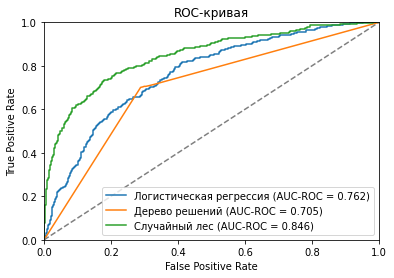

In [30]:
# получаем вероятности класса 1 для валидационной выборки для всех моделей
probabilities_lr = lr_model.predict_proba(features_valid)[:, 1]
probabilities_dt = tree_model.predict_proba(features_valid)[:, 1]
probabilities_rf = rf_model.predict_proba(features_valid)[:, 1]

# вычисляем значения false positive rate, true positive rate и пороги для всех моделей
fpr_lr, tpr_lr, thresholds_lr = roc_curve(target_valid, probabilities_lr)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(target_valid, probabilities_dt)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(target_valid, probabilities_rf)

# вычисляем значения AUC-ROC для всех моделей
auc_lr = roc_auc_score(target_valid, probabilities_lr)
auc_dt = roc_auc_score(target_valid, probabilities_dt)
auc_rf = roc_auc_score(target_valid, probabilities_rf)

# строим ROC-кривые для всех моделей
plt.figure()
plt.plot(fpr_lr, tpr_lr, label=f'Логистическая регрессия (AUC-ROC = {auc_lr:.3f})')
plt.plot(fpr_dt, tpr_dt, label=f'Дерево решений (AUC-ROC = {auc_dt:.3f})')
plt.plot(fpr_rf, tpr_rf, label=f'Случайный лес (AUC-ROC = {auc_rf:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend()
plt.show()

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Отлично
</div>


Исходя из результатов, полученных при обучении трех моделей (дерево решений, случайный лес, логистическая регрессия), лучшей оказалась модель случайного леса с наилучшим значением метрики F1 равной 0.629 и AUC-ROC равной 0.846.

В ходе исследования была изучена метрика AUC-ROC, которая позволяет оценить качество бинарной классификации. AUC-ROC представляет собой площадь под кривой ROC (Receiver Operating Characteristic), которая показывает зависимость между долей верных положительных классификаций (True Positive Rate) и долей ложных положительных классификаций (False Positive Rate) при изменении порога классификации.

В целом, исследование показало, что при работе с дисбалансом классов необходимо использовать специальные методы, например class_weight увеличение выборки, чтобы достичь наилучшего результата модели.

<div class="alert alert-block alert-danger">
<h2><s> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
 
По проекту нам важно попробовать минимум две техники борьбы с дисбалансом классов. Подбор порога можно назвать таковой техникой условно. Предлагаю попробовать также апсемплинг (можно взять и даунсемплинг). Посмотреть с ним все модели, подобрать заново гиперпараметры.

</div>


<div class="alert alert-info">
Апсемплинг и даунсемплинг с перебором параметров добавлен.

<div class="alert alert-success">
<h2> Комментарий ревьюера #2 <a class="tocSkip"> </h2>

👍 Теперь все отлично с полнотой исследования.
</div>



<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
 
Здесь важно указать гиперпараметры и метод борьбы с дисбалансом, которые мы используем для выбранной модели в тестировании. Ниже мы определяем их через переменные, поэтому сложно будет искать их по всему проекту.

</div>



## Тестирование модели

Построим модель с оптимальными значениями, выявленными в предыдущих пунктах исследования и проверим её на тестовой выборке. 

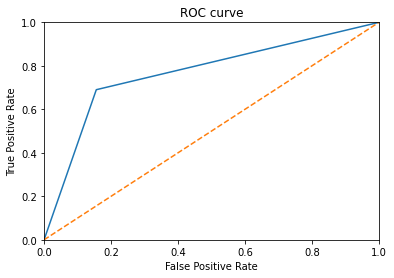

F1 Score: 0.6077003121748179
AUC-ROC Score: 0.7671574689950545


In [31]:
rf_model = RandomForestClassifier(random_state=12345, n_estimators=70, max_depth=9)
rf_model.fit(features_upsampled, target_upsampled)

rf_predictions = rf_model.predict(features_test)

f1 = f1_score(target_test, rf_predictions)
roc_auc = roc_auc_score(target_test, rf_predictions)

# вычисляем значения FPR, TPR и порогов для построения ROC-кривой
fpr, tpr, thresholds = roc_curve(target_test, rf_predictions)

# выводим график ROC-кривой
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

print(f"F1 Score: {f1}")
print(f"AUC-ROC Score: {roc_auc}")

Text(0.5, 1.0, 'Confusion matrix')

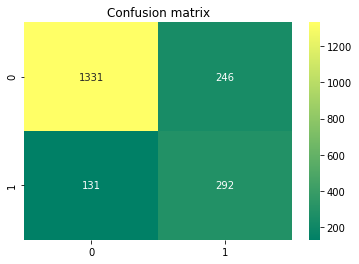

In [32]:
sns.heatmap(confusion_matrix(target_test, rf_predictions),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion matrix')

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
 
👍 Цветовая палитра "summer" выглядит оптимистично, как и результаты нашей модели.
</div>  
 

### Вывод

Проверка на тестовой выборке показала хорошие результаты - F1-меру равную 0.608 и AUC-ROC 0.767. 

Таким образом, мы можем заключить, что для прогнозирования оттока клиентов из банка, наилучшей моделью является модель случайного леса. В дальнейшем, для повышения точности модели, можно было бы провести работу по дополнительной предобработке данных, а также рассмотреть возможность использования других алгоритмов машинного обучения.

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Я бы добавил сравнение по f1-мере с константной моделью, также можно посмотреть recall и прокомментировать, какую долю клиентов на отток модель верно детектирует.
       
</div>


<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Здесь в дамми-модели я бы предсказал везде «1». Условно говоря, если предсказываем ноль, моделируем ситуацию, когда акцию с бонусами для удержания клиентов решили не проводить. Если предсказываем единицу − решили раздать бонусы вообще всем клиентам. Если в дамми-модели предсказываем по единице, можно подсчитать F1, она не будет зануляться.
    
`dummy_model = DummyClassifier(strategy='constant', constant=1)
dummy_model.fit(features_train, target_train)
f1_score(dummy_model.predict(features_test), target_test)`
    
Импорт: from sklearn.dummy import DummyClassifier

       
</div>


<div style="border:solid Chocolate 2px; padding: 40px">

**Общий вывод по проекту**
    
Спасибо за твой проект! Есть несколько важных моментов, которые необходимо улучшить. Их ты найдешь в разноцветных комментариях.
    
**Отмечу положительные моменты проекта🚀**
    
* Хорошая структура проекта. Выбор моделей, порядок исследования.
* Есть пояснения к шагам, код с высокой читаемостью. 
* Логичность решений.
* Хороший результат на тестовой выборке.
    
**На что стоит обратить внимание🤔**
    
* Необходимо изменить подход к заполнению пропусков. Заполняем до разделения на выборки.
* Гиперпараметры моделеям подбираем в каждом случае применения методики борьбы с дисбалансом и в исследовании моделей без учета дисбаланса.
* У всех моделей важно измерить ROC_AUC.
* Важно попробовать минимум две техники борьбы с дисбалансом классов.
* Эти и остальные замечания я также написал по ходу проекта.
    
**Желаю удачи и жду твой проект на повторное ревью!**😉
    
    
</div>

<div style="border:solid Chocolate 2px; padding: 40px">

**Комментарий ко второй проверке**

Спасибо за качественную доработку. Практически все верно. Однако еще кое-что осталось.
    
* В апсемплинге нужно подобрать верный коэффициент. Можно попробовать использовать SMOTE.

**Желаю удачи и жду твой проект на повторное ревью!**😉
</div>


<div style="border:solid Chocolate 2px; padding: 40px">

**Комментарий к финальной проверке**

Спасибо за доработку. Критичных комментариев нет. 

Желаю удачи в дальнейшей учебе!

</div>



## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*